In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.sans-serif"] = "Arial"
import matplotlib.ticker
import matplotlib.cm as cm


In [2]:
dry = pd.read_csv('data\\Dry.csv')
dry.head()
fox = pd.read_csv('data\\Fox.csv')


In [3]:
segmentsDry = set(dry['IX'])
segmentsFox = set(fox['IX'])


In [4]:
dry.head()

,X,Y,streamorde,IX,Shape_Leng,X_UTM,Y_UTM,flowacc_co,slp_deg_co,AngeloSage
0,457888,4379397,4384,21564,4384,457888,4379397,656490,4.17938,741.708
1,457889,4379397,4384,21564,4384,457889,4379397,656494,5.32382,741.622
2,457890,4379397,4384,21564,4384,457890,4379397,656499,4.39489,741.633
3,457891,4379398,4384,21564,4384,457891,4379398,656509,10.85030,741.695
4,457892,4379399,4384,21564,4384,457892,4379399,656576,8.50299,741.586


In [5]:
dry = dry.sample(frac=0.5)
fox = fox.sample(frac=0.5)

dry = dry.sort_values(['IX', 'AngeloSage'])
fox = fox.sort_values(['IX', 'AngeloSage'])

In [6]:
def dist(x1, y1, x2, y2):
    distance = np.sqrt( (x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [7]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))




In [8]:
slopesDry = []
areasDry = []
elevsDry = []
XsDry = []
YsDry = []

slopesFox = []
areasFox = []
elevsFox = []
XsFox = []
YsFox = []

In [9]:
contourThreshold = 3


In [10]:
###DRY

for segment in segmentsDry:
    df = dry[dry['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasDry.append(df.iloc[i]['flowacc_co'])
                    elevsDry.append(df.iloc[i]['AngeloSage'])
                    XsDry.append(df.iloc[i]['X_UTM'])
                    YsDry.append(df.iloc[i]['Y_UTM'])
                    slopesDry.append((dif/distance)*100)
                    break

                    
                    

In [11]:
###FOX

for segment in segmentsFox:
    df = fox[fox['IX'] == segment]
#    df = df.sort_values('AngeloSage')
    #i: iterate over every pixel i in the stream segment
    for i in range(0, len(df)):
        distance = 0
        #j: iterate over this pixel to the end
        foundMax = False
        for j in range(i, len(df)-1):
#                 print 'j = ' + str(j)
                #Calculate new distance
                distance = distance + dist(df.iloc[j]['X'],
                                           df.iloc[j]['Y'],
                                           df.iloc[j+1]['X'],
                                           df.iloc[j+1]['Y'])
                #Calculate elevation difference
                dif = (df.iloc[j+1]['AngeloSage'] - df.iloc[i]['AngeloSage']) 
                if dif > contourThreshold:
                    areasFox.append(df.iloc[i]['flowacc_co'])
                    elevsFox.append(df.iloc[i]['AngeloSage'])
                    XsFox.append(df.iloc[i]['X_UTM'])
                    YsFox.append(df.iloc[i]['Y_UTM'])
                    slopesFox.append((dif/distance)*100)
                    break


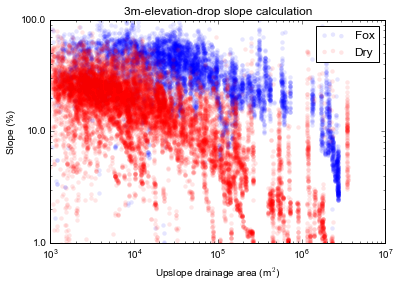

In [19]:

plt.scatter(areasFox,slopesFox,
            #c = get_colors(elevsFox, plt.cm.jet),
            color='Blue',
            label='Fox', alpha=0.1, linewidth=0)
plt.scatter(areasDry,slopesDry,
            #c = get_colors(elevsDry, plt.cm.jet),
            color='Red',
            label='Dry', alpha=0.1, linewidth=0)
plt.legend(loc='best',numpoints=1)
plt.xlabel(r'Upslope drainage area (m$^2$)')
plt.ylabel('Slope (%)')
plt.xlim([1000,10**7])
plt.ylim([1,100])
plt.xscale('log')
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.title('3m-elevation-drop slope calculation')
plt.savefig('Figs\\ChannelNetwork-SlopeArea-DryFox-3m.pdf')

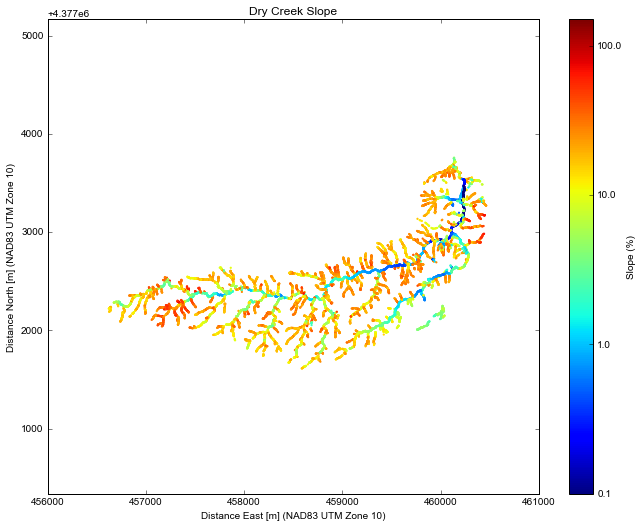

In [45]:


fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsDry,YsDry,
            c = slopesDry, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasDry)
#cb = plt.colorbar(ax, label='Slope')
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())

plt.axis('equal')
plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Dry Creek Slope')
plt.savefig('Figs\\DrySlopeMap.pdf')

In [41]:
max(YsFox)

4400112.3646299997

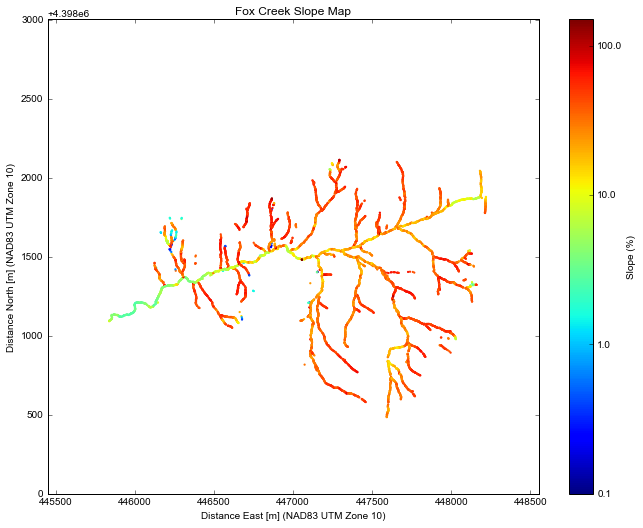

In [46]:
fig, ax = plt.subplots(figsize=[11,8.5])
ax= plt.scatter(XsFox,YsFox,
            c = slopesFox, cmap = cm.jet, vmin = 0.1, vmax = 150,norm=matplotlib.colors.LogNorm(),
            alpha=1, s=5, linewidth=0, zorder=areasFox)
cb = plt.colorbar(ax, label='Slope (%)', format=matplotlib.ticker.ScalarFormatter())
plt.axis('equal')
plt.ylim([4398000, 4401000]) # 4398485.0 4400112
plt.xlim([445000, 449000]) # 445836.0 448219.0

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlabel('Distance East [m] (NAD83 UTM Zone 10)')
plt.ylabel('Distance North [m] (NAD83 UTM Zone 10)')

plt.title('Fox Creek Slope Map')
plt.savefig('Figs\\FoxSlopeMap.pdf')